In [14]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error


data = pd.read_csv('/content/hw5_treasury yield curve data-2.csv', index_col = "Date")
df = pd.DataFrame(data)


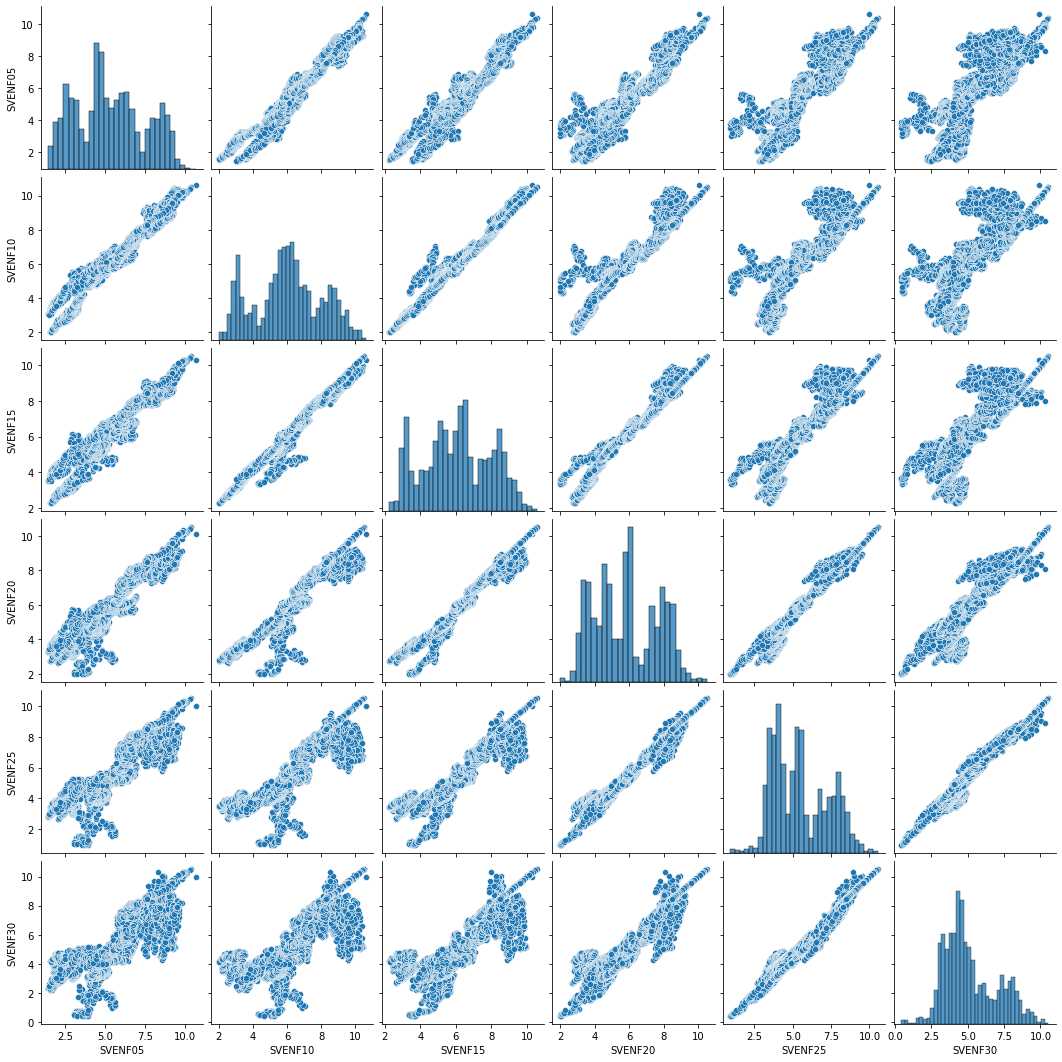

In [3]:
columns = ['SVENF05','SVENF10','SVENF15','SVENF20','SVENF25','SVENF30']
print(sns.pairplot(df[columns]))

In [9]:
# PCA

pca = PCA()
pca.fit(df)

explained_vr_all = pca.explained_variance_ratio_
print("Explained variance ratios for all components\n\n")
print(explained_vr_all)


Explained variance ratios for all components


[9.20370174e-01 3.82775527e-02 2.96262740e-02 7.72048572e-03
 3.12324392e-03 7.93886907e-04 7.72341832e-05 9.94299038e-06
 1.11271669e-06 8.53993376e-08 6.77945572e-09 4.45814651e-10
 3.64034519e-11 8.17682433e-12 7.15970769e-12 7.06827802e-12
 7.03958716e-12 7.00243079e-12 6.99614309e-12 6.84579901e-12
 6.79822880e-12 6.72419289e-12 6.66166703e-12 6.62537303e-12
 6.48782157e-12 6.44503048e-12 6.41842455e-12 6.34873944e-12
 6.29380466e-12 6.24100477e-12 6.09400272e-12]


In [16]:
# n_components = 3

pca2 = PCA(n_components=3)
pca2.fit(df)

explained_vr_3 = pca2.explained_variance_ratio_
print("Explained variance ratios for first three components \n\n")
print(explained_vr_3)

print("\n")

cumulative_explained_vr_3 = np.sum(explained_vr_3)
print("Cumulative explained variance ratios for first three components \n\n")
print(cumulative_explained_vr_3)

Explained variance ratios for first three components 


[0.92037017 0.03827755 0.02962627]


Cumulative explained variance ratios for first three components 


0.9882740007817398


In [21]:
# Linear Regression 

X= df.drop('Adj_Close', axis = 1).values
y = df['Adj_Close'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

linreg_orig = LinearRegression()
linreg_orig.fit(X_train, y_train)


y_pred_train_orig = linreg_orig.predict(X_train)
y_pred_test_orig = linreg_orig.predict(X_test)
r2_train_orig = r2_score(y_train, y_pred_train_orig)
r2_test_orig = r2_score(y_test, y_pred_test_orig)
rmse_train_orig = np.sqrt(mean_squared_error(y_train, y_pred_train_orig))
rmse_test_orig = np.sqrt(mean_squared_error(y_test, y_pred_test_orig))
print('Original Dataset: ')
print('R2 Score (in-sample):', r2_train_orig)
print('R2 Score (out-of-sample):', r2_test_orig)
print('RMSE (in-sample):', rmse_train_orig)
print('RMSE (out-of-sample):', rmse_test_orig)



pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.15, random_state=42)

linreg_pca = LinearRegression()
linreg_pca.fit(X_train_pca, y_train)


y_pred_train_pca = linreg_pca.predict(X_train_pca)
y_pred_test_pca = linreg_pca.predict(X_test_pca)
r2_train_pca = r2_score(y_train, y_pred_train_pca)
r2_test_pca = r2_score(y_test, y_pred_test_pca)
rmse_train_pca = np.sqrt(mean_squared_error(y_train, y_pred_train_pca))
rmse_test_pca = np.sqrt(mean_squared_error(y_test, y_pred_test_pca))
print('\n\nPCA Transformed Dataset: (3 PCs)')
print('R2 Score (in-sample):', r2_train_pca)
print('R2 Score (out-of-sample):', r2_test_pca)
print('RMSE (in-sample):', rmse_train_pca)
print('RMSE (out-of-sample):', rmse_test_pca)


Original Dataset: 
R2 Score (in-sample): 0.9022730353400412
R2 Score (out-of-sample): 0.9041309535336589
RMSE (in-sample): 0.7766533040369964
RMSE (out-of-sample): 0.7823695855060314


PCA Transformed Dataset: (3 PCs)
R2 Score (in-sample): 0.8673885521430047
R2 Score (out-of-sample): 0.8663783970490899
RMSE (in-sample): 0.904712305616479
RMSE (out-of-sample): 0.923657782290137


In [22]:

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

X= df.drop('Adj_Close', axis = 1).values
y = df['Adj_Close'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

model_orig = SVR(kernel='linear')
model_orig.fit(X_train, y_train)

y_pred_train_orig = model_orig.predict(X_train)
y_pred_test_orig = model_orig.predict(X_test)
r2_train_orig = r2_score(y_train, y_pred_train_orig)
r2_test_orig = r2_score(y_test, y_pred_test_orig)
rmse_train_orig = np.sqrt(mean_squared_error(y_train, y_pred_train_orig))
rmse_test_orig = np.sqrt(mean_squared_error(y_test, y_pred_test_orig))

print('Original Dataset: ')
print('R2 Score (in-sample):', r2_train_orig)
print('R2 Score (out-of-sample):', r2_test_orig)
print('RMSE (in-sample):', rmse_train_orig)
print('RMSE (out-of-sample):', rmse_test_orig)

pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)

X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.15, random_state=42)
model_pca = SVR(kernel='linear')
model_pca.fit(X_pca_train, y_train)

y_pred_train_pca = model_pca.predict(X_pca_train)
y_pred_test_pca = model_pca.predict(X_pca_test)
r2_train_pca = r2_score(y_train, y_pred_train_pca)
r2_test_pca = r2_score(y_test, y_pred_test_pca)
rmse_train_pca = np.sqrt(mean_squared_error(y_train, y_pred_train_pca))
rmse_test_pca = np.sqrt(mean_squared_error(y_test, y_pred_test_pca))

print('\n\nPCA Transformed Dataset (3 PCs): ')
print('R2 Score (in-sample):', r2_train_pca)
print('R2 Score (out-of-sample):', r2_test_pca)
print('RMSE (in-sample):', rmse_train_pca)
print('RMSE (out-of-sample):', rmse_test_pca)

Original Dataset: 
R2 Score (in-sample): 0.8933252828019729
R2 Score (out-of-sample): 0.8944423795571245
RMSE (in-sample): 0.8114294001125022
RMSE (out-of-sample): 0.8209515946893111


PCA Transformed Dataset (3 PCs): 
R2 Score (in-sample): 0.8624772713954313
R2 Score (out-of-sample): 0.8612034970079638
RMSE (in-sample): 0.9213130641262457
RMSE (out-of-sample): 0.9413736051988828


In [23]:
print("My name is Prabhuling Masoodi")
print("My NetID is: 674647769")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Prabhuling Masoodi
My NetID is: 674647769
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
